<a href="https://colab.research.google.com/github/EutruTepit/BigData2022/blob/main/Trabalhos/Atividade_2_%5BBIG_DATA%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data & Data Analytics
Atividade 2 - Exercícios com Pandas e visualização de Dados (duplas)

Aulos: Welinton Haas, Luís Felippe Tomazini Fernandes

## 1. Carregamento dos dados

Contém 14 colunas: classe, e (álcool, ácido málico, cinzas, alcalinidade da cinza, magnésio, total de fenóis, flavonóides, fenóis não-flavonoides, proantocianinas, intensidade de cor, tonalidade, OD280/OD315 de vinhos diluídos, prolina)

Carregue corretamente os dados sobre vinho, utilizando o seguinte link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data. Defina corretamente o nome das colunas e abrevie como/se achar necessário. A resposta para esta questão é o próprio código de carregamento usando Pandas.

In [91]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names=[
                                     'Classe',
                                     'álcool',
                                     'ácido málico',
                                     'cinzas', 
                                     'alcalinidade da cinza',
                                     'magnésio', 
                                     'total de fenóis', 
                                     'flavonóides', 
                                     'fenóis não-flavonoides', 
                                     'proantocianidinas', 
                                     'intensidade de cor', 
                                     'tonalidade', 
                                     'OD280/OD315 de vinhos diluídos', 
                                     'prolina'
                                     ])

remap={
  'Classe': 'classe',
  'álcool': 'alcool',
  'ácido málico': 'acidoM',
  'cinzas': 'cinzas', 
  'alcalinidade da cinza': 'alcali_Cinza',
  'magnésio': 'magne', 
  'total de fenóis': 'total_Fenol', 
  'flavonóides': 'flavo', 
  'fenóis não-flavonoides': 'fenol_N_Flavo', 
  'proantocianidinas': 'proanto', 
  'intensidade de cor': 'intensi_cor', 
  'tonalidade': 'tonalidade', 
  'OD280/OD315 de vinhos diluídos': "diluidos", 
  'prolina': 'prolina'
}

df.rename(remap, axis=1, inplace=True)
df.head()

,classe,alcool,acidoM,cinzas,alcali_Cinza,magne,total_Fenol,flavo,fenol_N_Flavo,proanto,intensi_cor,tonalidade,diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2. Quais são os tipos das variáveis desse conjunto de dados? Há alguma coluna que não seja numérica? Se sim, qual?

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   classe         178 non-null    int64  
 1   alcool         178 non-null    float64
 2   acidoM         178 non-null    float64
 3   cinzas         178 non-null    float64
 4   alcali_Cinza   178 non-null    float64
 5   magne          178 non-null    int64  
 6   total_Fenol    178 non-null    float64
 7   flavo          178 non-null    float64
 8   fenol_N_Flavo  178 non-null    float64
 9   proanto        178 non-null    float64
 10  intensi_cor    178 non-null    float64
 11  tonalidade     178 non-null    float64
 12  diluidos       178 non-null    float64
 13  prolina        178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## 3. Utilizando a funcionalidade de agrupamento do Pandas, descubra qual a quantidade de observações (linhas) por classe. Qual a classe com maior quantidade de observações? Obs.: Pesquisar por groupby + count ou value_counts

In [93]:
df.groupby(["classe"]).size()

classe
1    59
2    71
3    48
dtype: int64

In [94]:
# ou
df.groupby(["classe"]).count()

,alcool,acidoM,cinzas,alcali_Cinza,magne,total_Fenol,flavo,fenol_N_Flavo,proanto,intensi_cor,tonalidade,diluidos,prolina
classe,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,48,48,48,48,48,48,48,48,48,48,48,48,48


## 4. Qual a coluna do conjunto de dados com maior desvio padrão (std)? Há alguma explicação?

R: A prolina, possivelmente está em outra unidade de medida.


In [95]:
df.describe().T # t transposição

,count,mean,std,min,25%,50%,75%,max
classe,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcool,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
acidoM,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
cinzas,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcali_Cinza,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magne,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_Fenol,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavo,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
fenol_N_Flavo,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanto,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [96]:
df.std()

classe             0.775035
alcool             0.811827
acidoM             1.117146
cinzas             0.274344
alcali_Cinza       3.339564
magne             14.282484
total_Fenol        0.625851
flavo              0.998859
fenol_N_Flavo      0.124453
proanto            0.572359
intensi_cor        2.318286
tonalidade         0.228572
diluidos           0.709990
prolina          314.907474
dtype: float64

## 5. Observando o histograma da coluna ácido málico (malic acid), o que pode ser inferido?

R: 

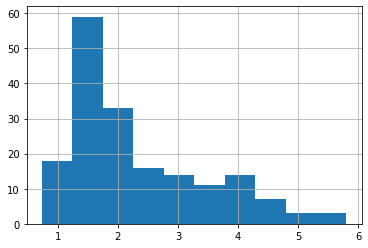

In [97]:
df['acidoM'].hist();

## 6. Observando o histograma da coluna "álcool", o que pode ser inferido?

R: Não há uma disparidade muito grande dos dados

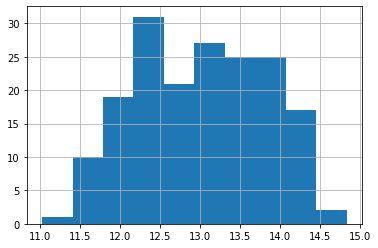

In [85]:
df['alcool'].hist();

## 7. Qual o maior valor observado de nível de álcool?

In [86]:
df['alcool'].max()

14.83

## 8. Qual o menor valor observado de cinzas? Qual o tipo (classe) dessa observação? Obs: utilizar o filtro do Pandas.

In [87]:
df['cinzas'].min()

1.36

## 9. Busque pelos exemplos de índice 0 e 100. Qual a classe deles?

In [88]:
df.iloc[[0, 100]]['classe']

0      1
100    2
Name: classe, dtype: int64

## 10. Alguma das colunas possuem outliers? Quais?

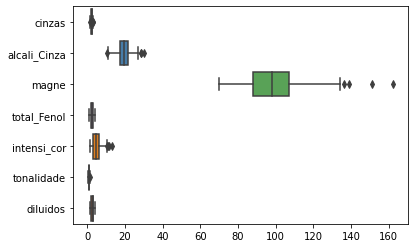

In [89]:
import seaborn as sns
#sns.boxplot(data = df, y = "cinzas")
#sns.boxplot(data = df, y = "alcali_Cinza")
#sns.boxplot(data = df, y = "magne")
#sns.boxplot(data = df, y = "total_Fenol")
#sns.boxplot(data = df, y = "intensi_cor")
#sns.boxplot(data = df, y = "tonalidade")
#sns.boxplot(data = df, y = "diluidos")
df_2 = df[['cinzas', 'alcali_Cinza', 'magne', 'total_Fenol', 'intensi_cor', 'tonalidade', 'diluidos']]
sns.boxplot(data=df_2, orient="h", palette="Set1");

## 11. Calcule o intervalo interquartil (IIQ), o max e o min da coluna magnésio.

In [99]:
print("Magnésio Max:", df['magne'].max())
print("Magnésio Min:", df['magne'].min())

Q1 = df['magne'].quantile(0.25)
Q3 = df['magne'].quantile(0.75)
IQR = Q3 - Q1
print('Intervalo interquartil ', IQR)

Magnésio Max: 162
Magnésio Min: 70
Intervalo interquartil  19.0


In [100]:
bi = Q1 - 1.5*IQR
bs = Q1 - 1.5*IQR

(bi, bs)

(59.5, 59.5)